In [1]:
import pandas as pd
df=pd.read_csv('c:/vscode/data/sample.csv')
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [2]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [3]:
import missingno as msno
import matplotlib.pyplot as plt

<AxesSubplot:>

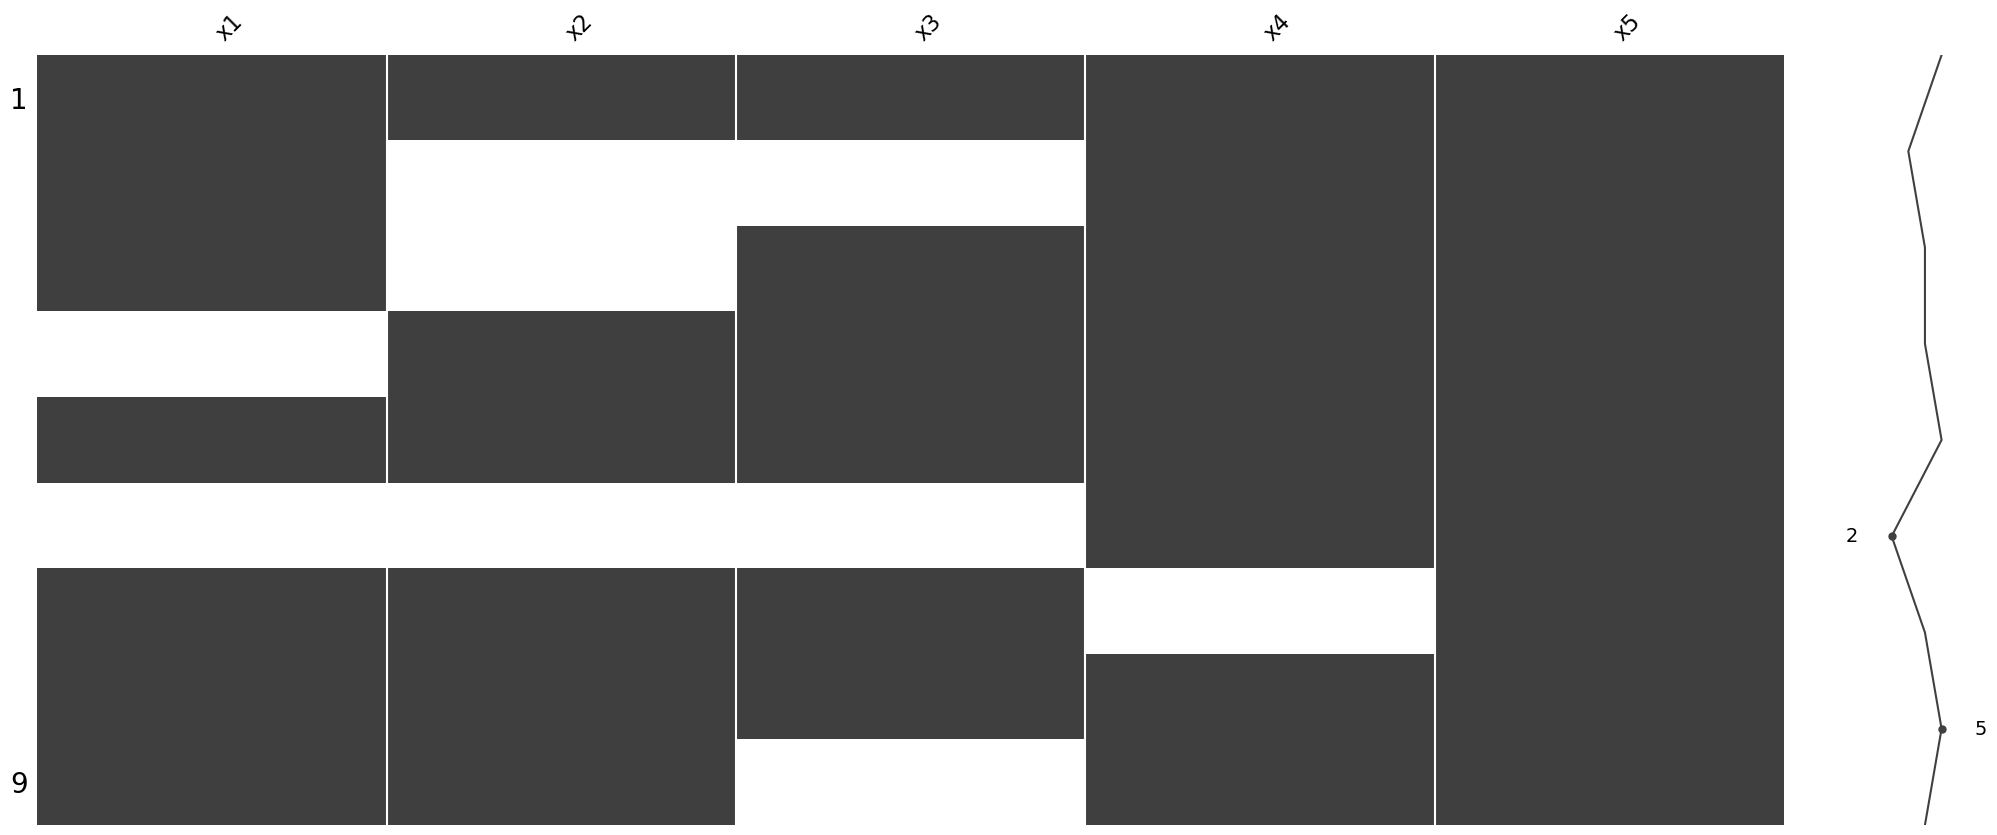

In [4]:
msno.matrix(df)     #흰색=결측값

<AxesSubplot:>

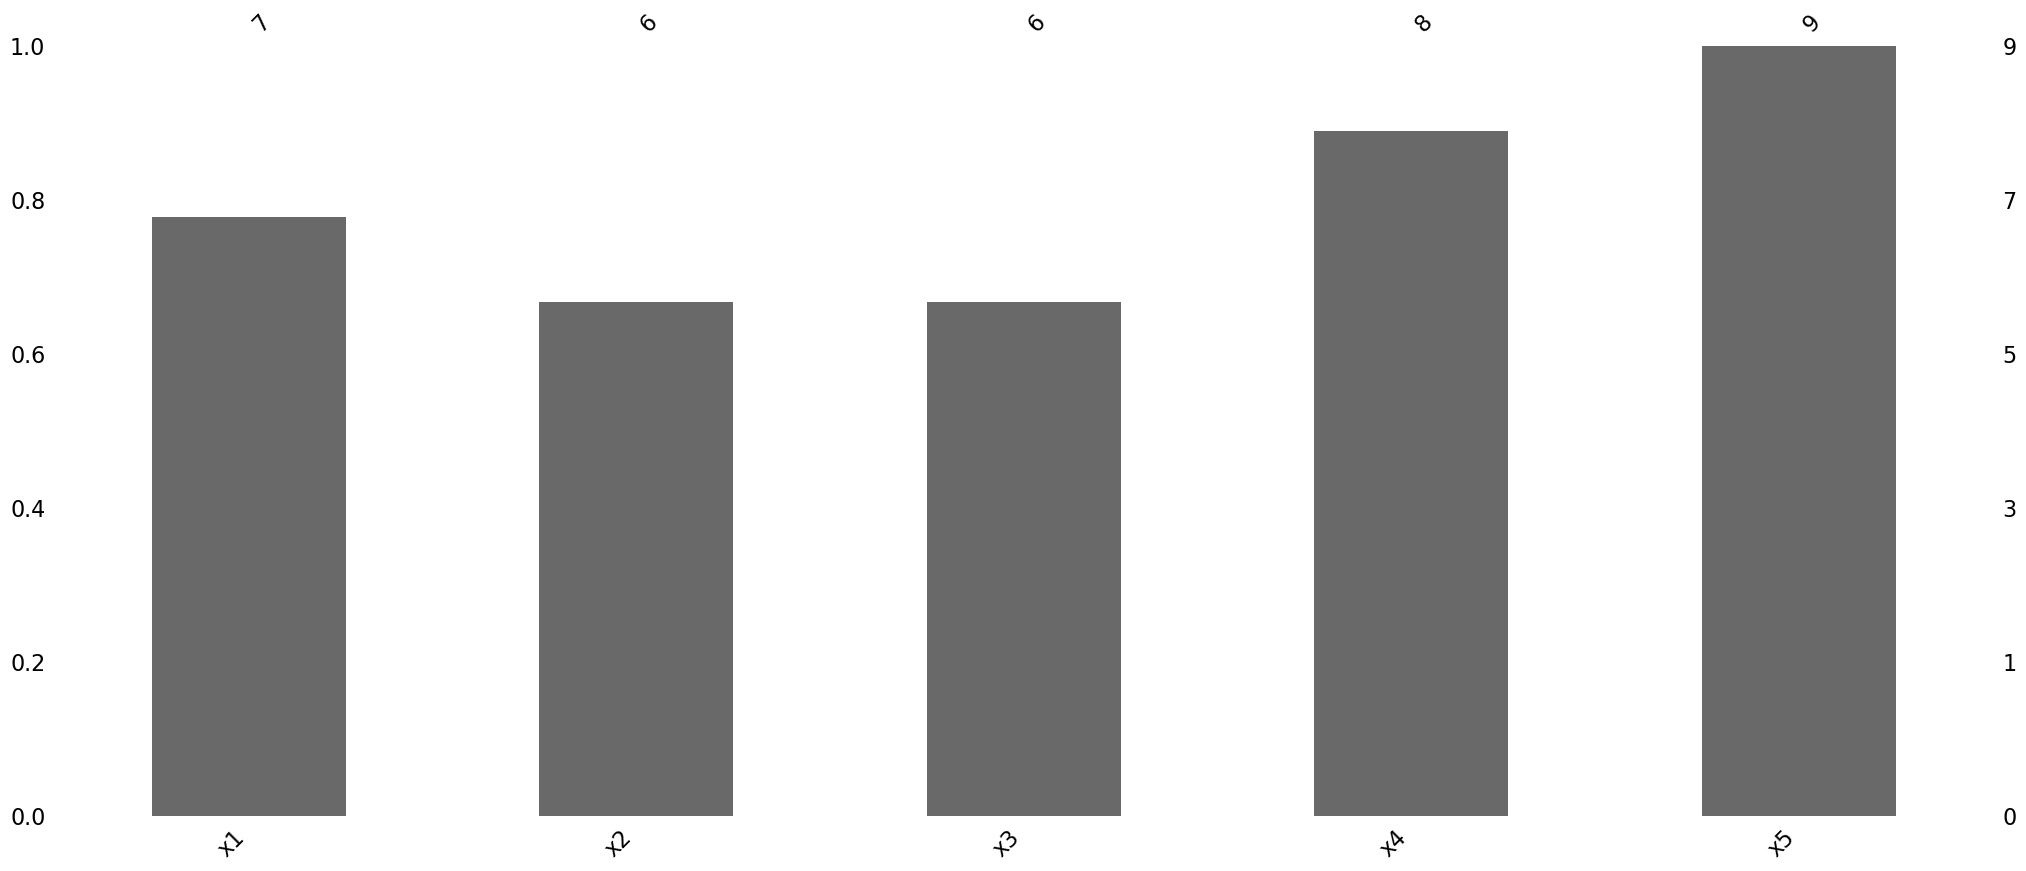

In [5]:
msno.bar(df) #필드별 데이터 완성도

**타이타닉 데이터**

In [16]:
import seaborn as sns
titanic = sns.load_dataset("titanic")

<AxesSubplot:>

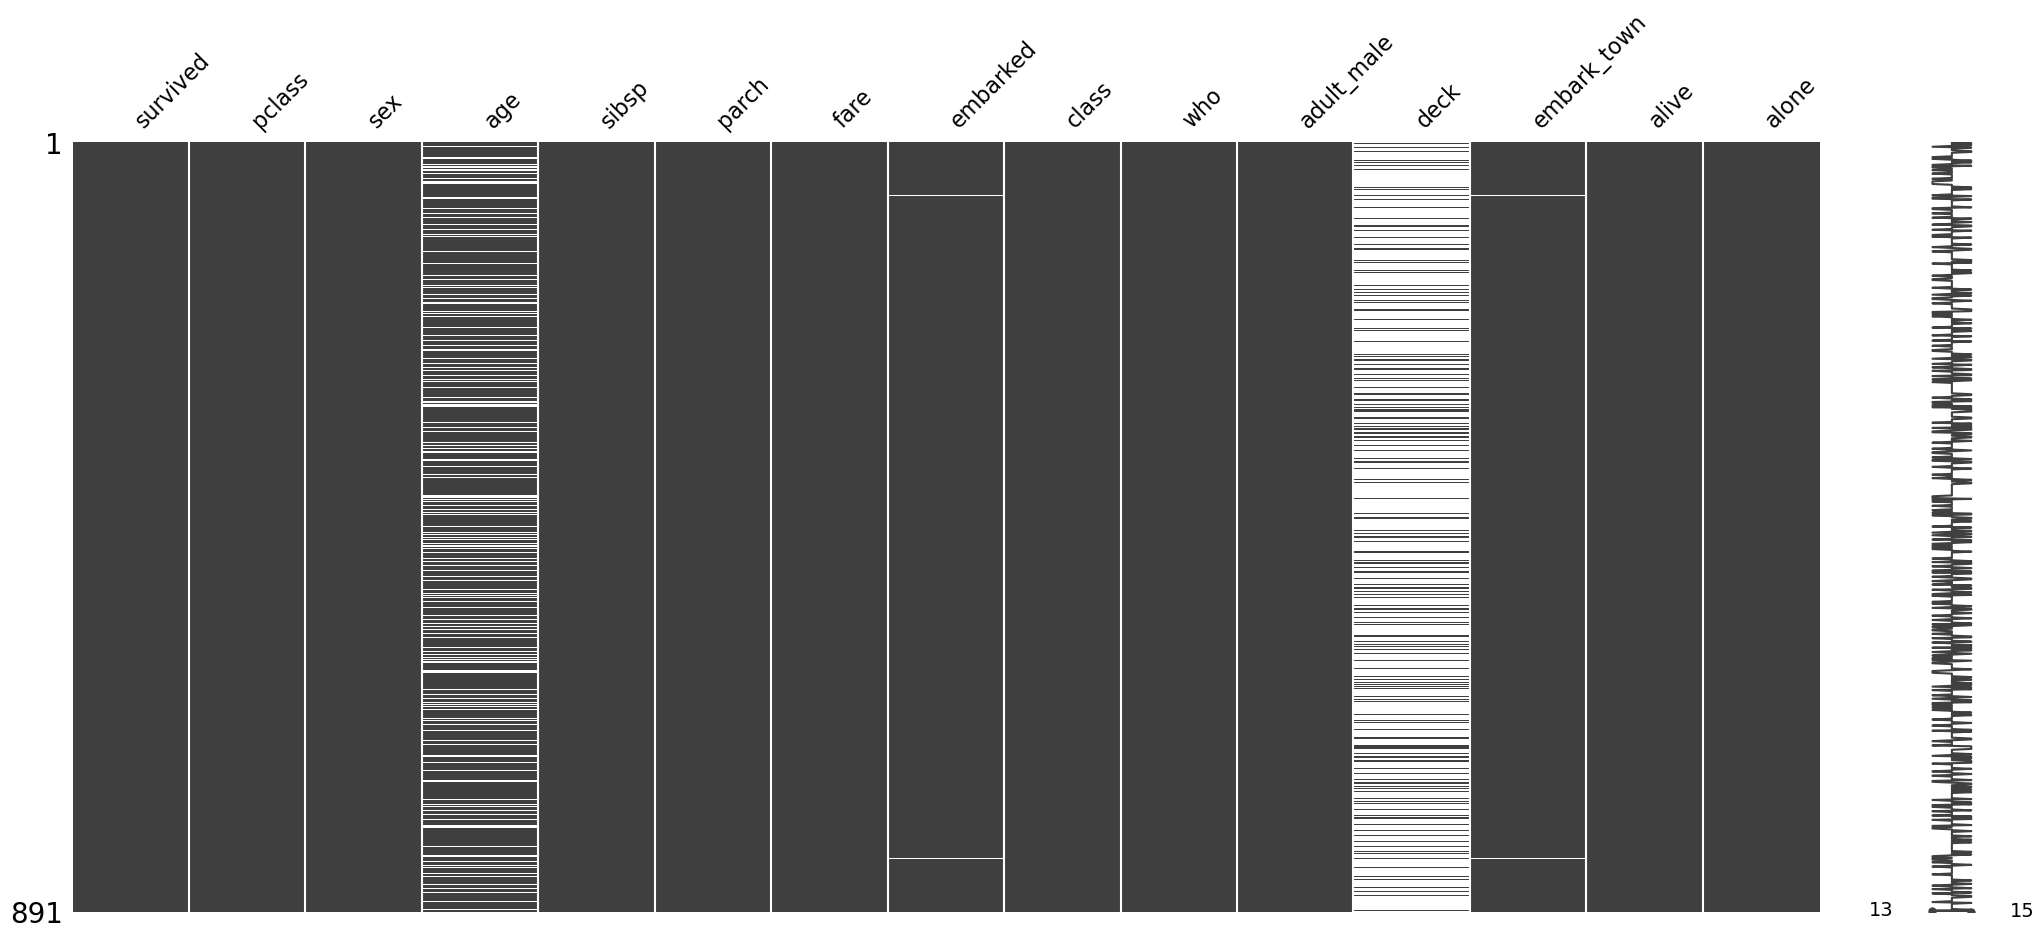

In [7]:
msno.matrix(titanic)

<AxesSubplot:>

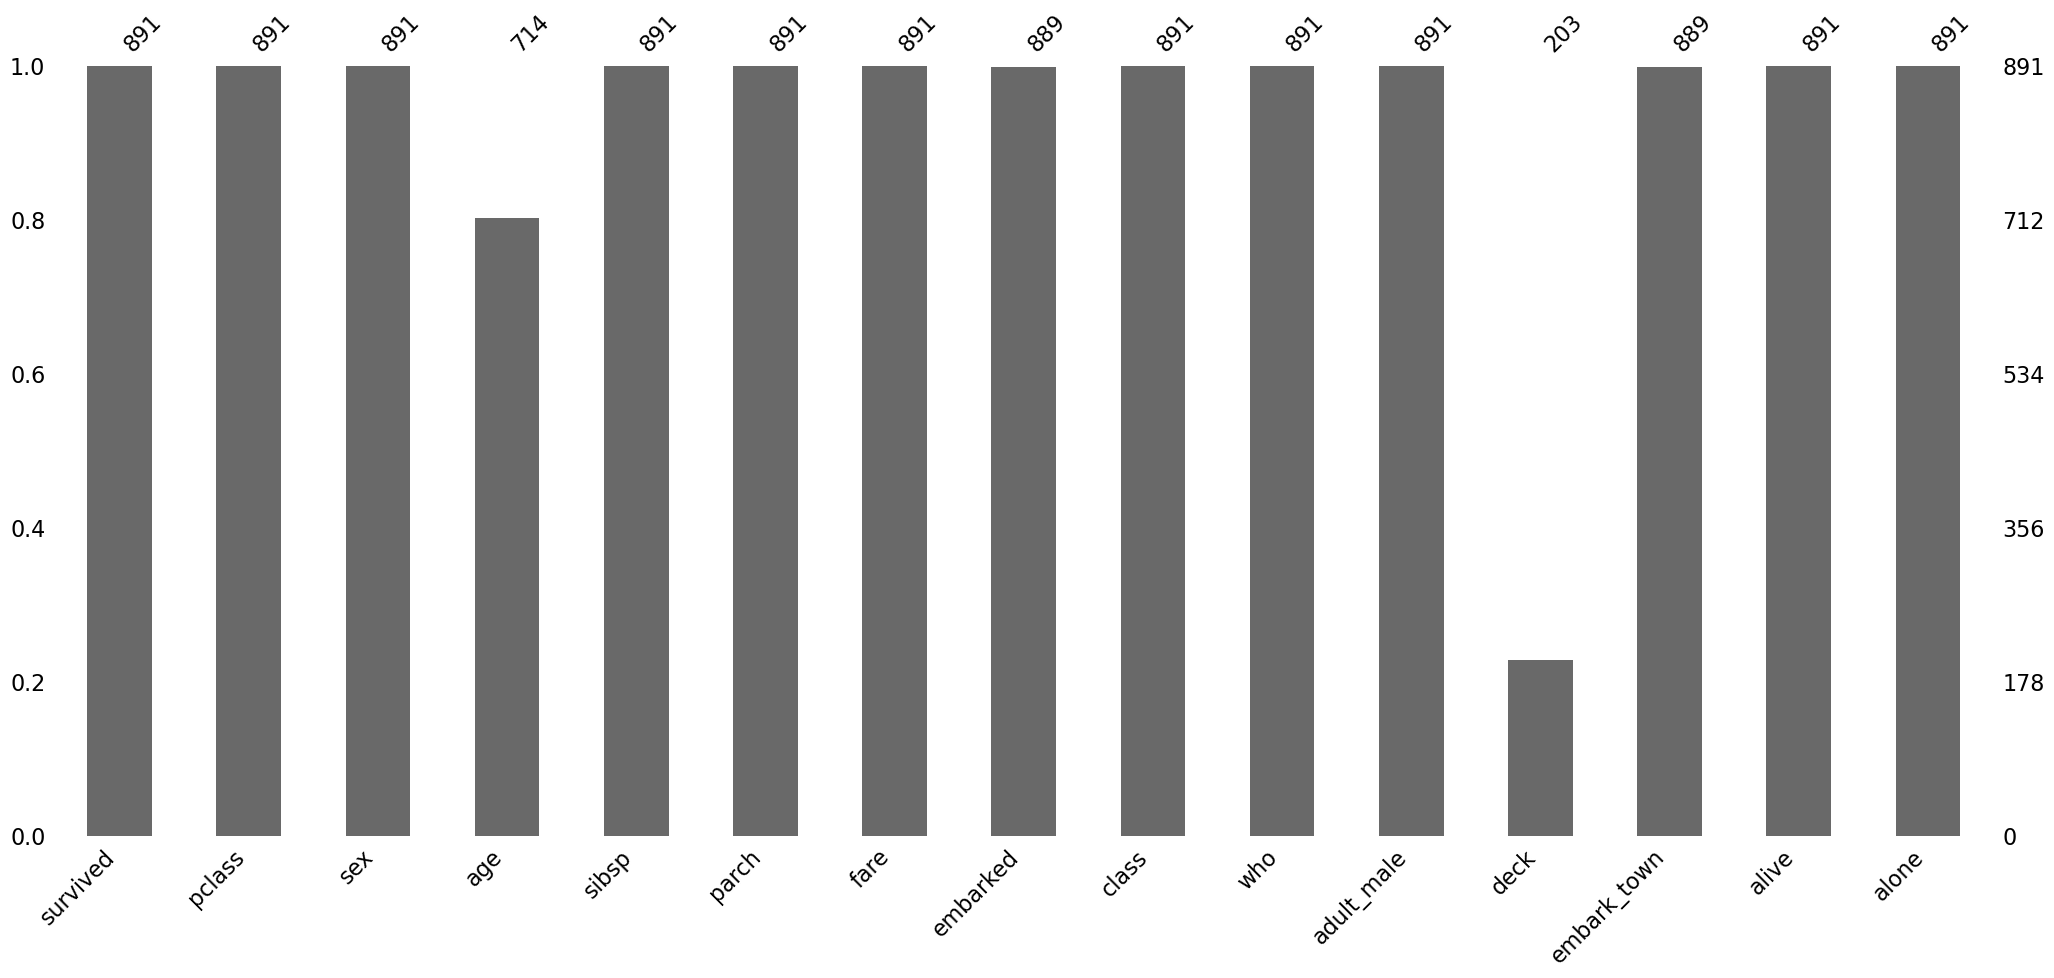

In [8]:
msno.bar(titanic)

<AxesSubplot:>

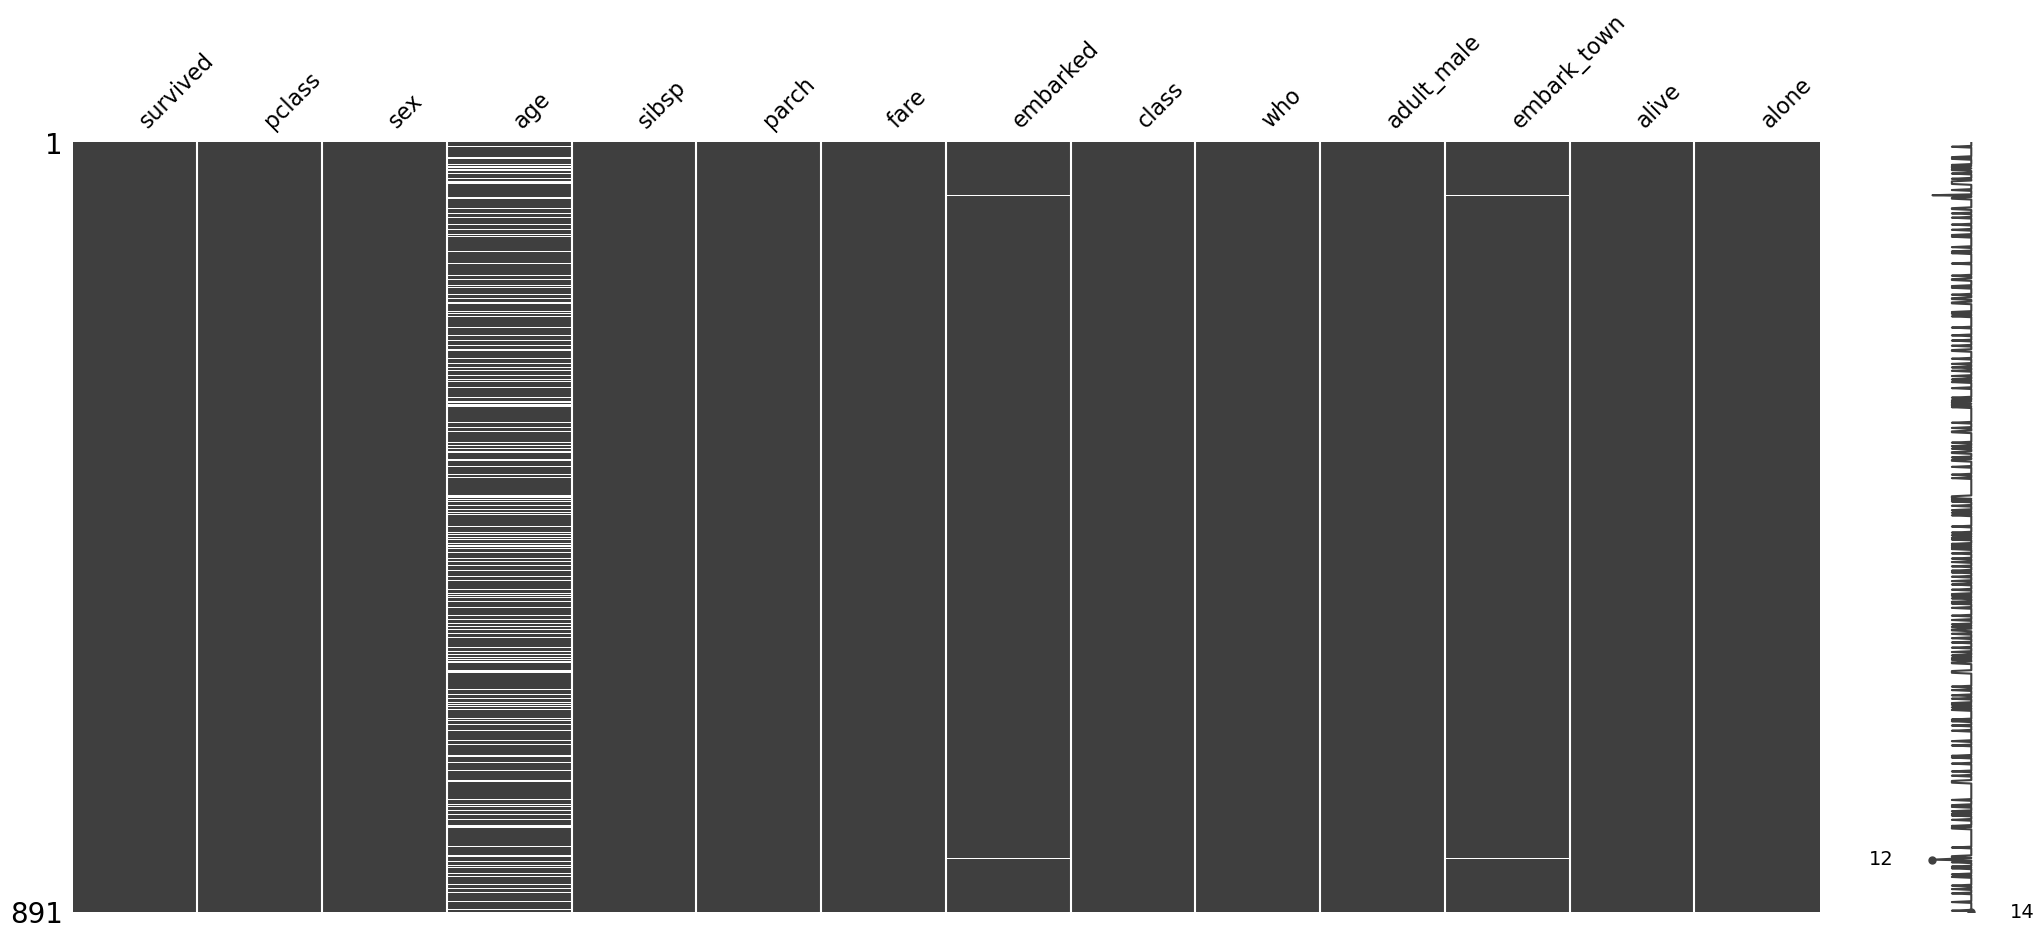

In [17]:
# titanic.dropna()
# titanic.dropna(axis=1)
# titanic.dropna(thresh=7, axis=1)
titanic = titanic.dropna(thresh=int(len(titanic) * 0.5),
axis=1)
msno.matrix(titanic)

In [11]:
from sklearn.impute import SimpleImputer
# 결측값을 mean 평균값으로, median 중위수로, most_freqeunt 최빈수로 대체
# 일반적으로 실수형 연속값인 경우 평균 또는 중위수
# 정규분포인 경우 평균을 사용하는 것이 유리하고 비정규분포인 경우 중위수가 유리함
# 카테고리인 경우 최빈값을 사용하는 것이 좋음
# imputer = SimpleImputer(strategy="most_frequent")
# titanic = pd.DataFrame(imputer.fit_transform(titanic), columns=titanic.columns)
# titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.925,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.05,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0,C,First,man,True,Cherbourg,yes,True


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'embark_town')

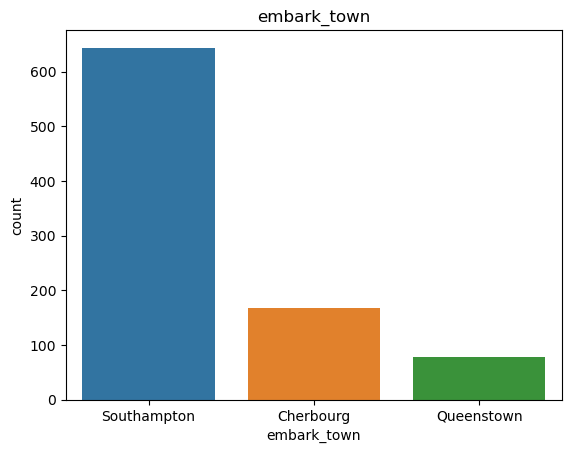

In [18]:
#출발지
sns.countplot(titanic.embark_town)
plt.title("embark_town")

<AxesSubplot:>

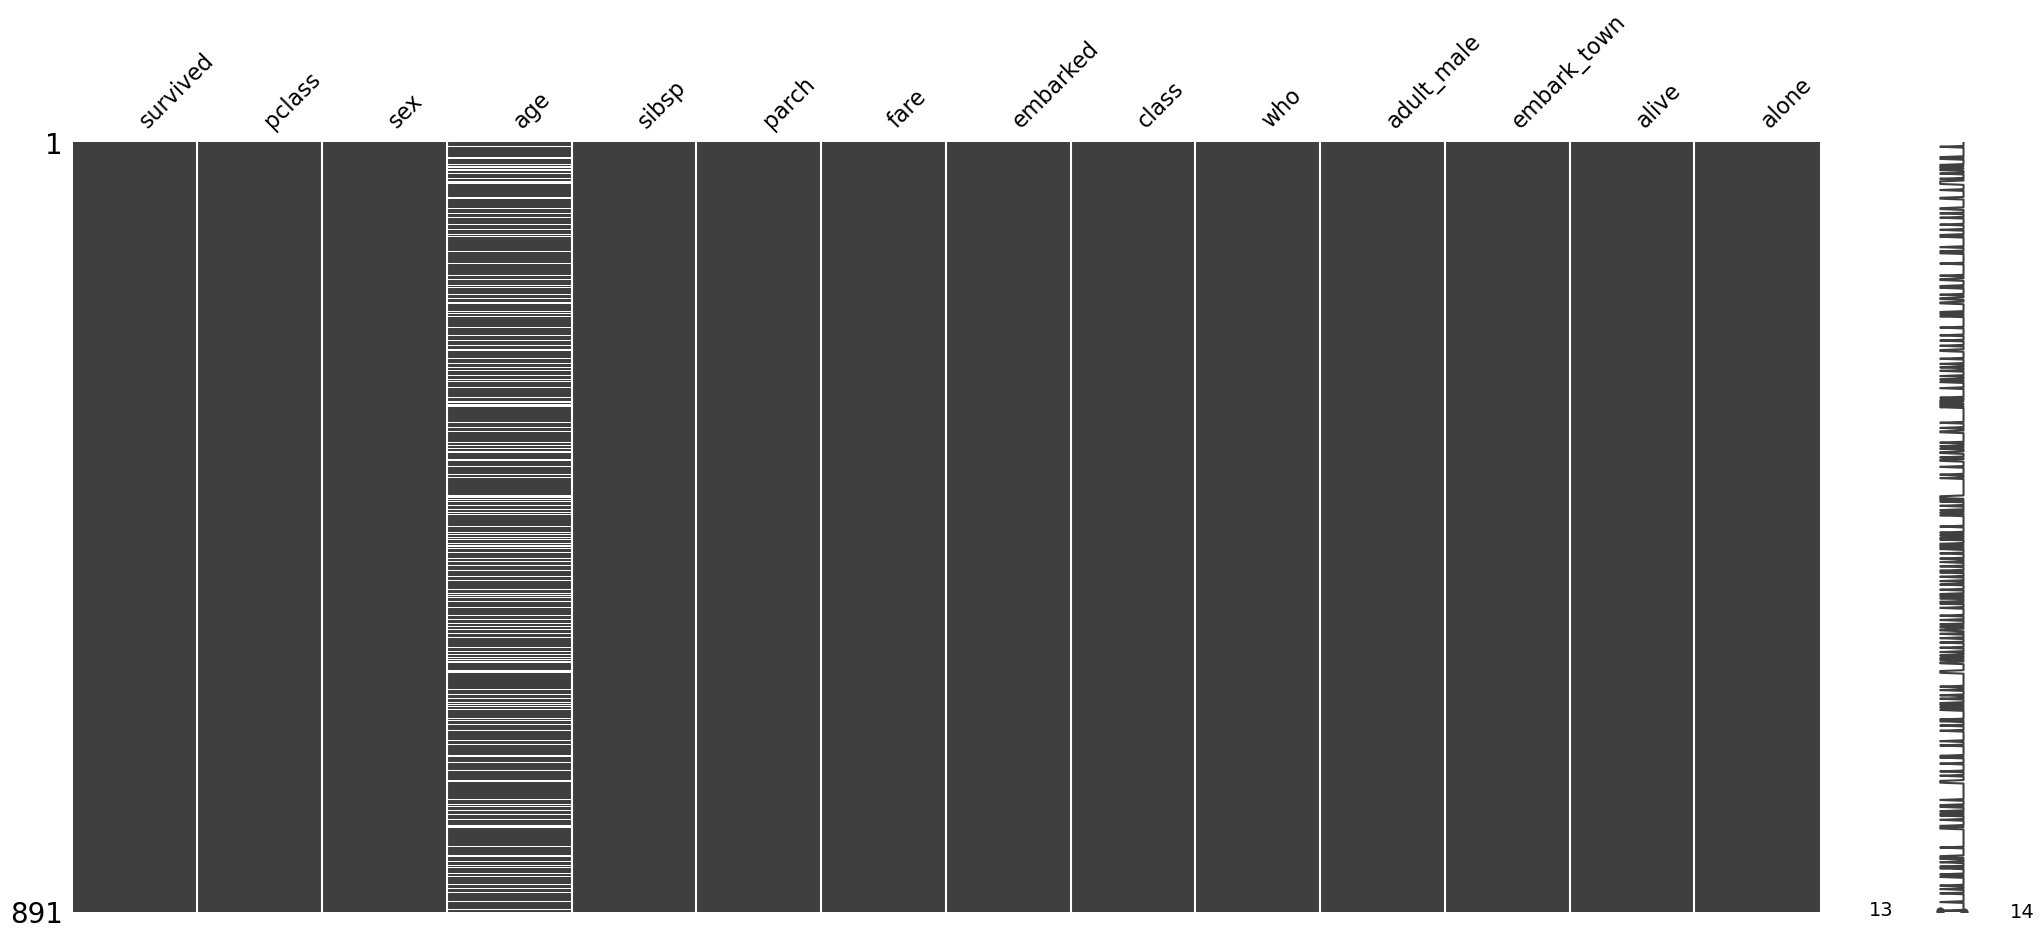

In [19]:
from sklearn.impute import SimpleImputer
#출발지는 범주형이므로 최빈수가 적당함
imputer_embark_town = SimpleImputer(strategy="most_frequent")
#출발지(fit_transform() 함수에는 2차원 배열을 입력해야 함)
titanic["embark_town"] = imputer_embark_town.fit_transform
(titanic[["embark_town"]])
#출발지의 고유 이니셜
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])
msno.matrix(titanic)

Text(0.5, 1.0, 'age')

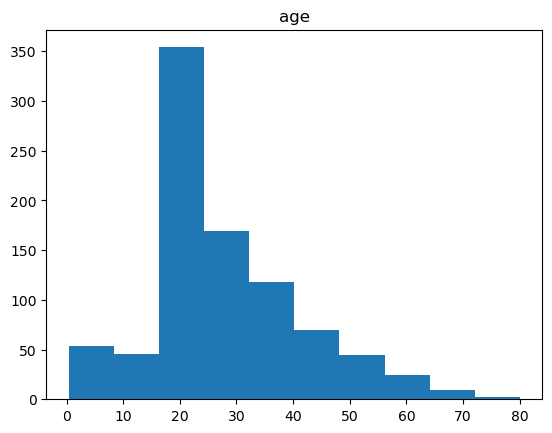

In [14]:
plt.hist(titanic.age)
plt.title("age")

<AxesSubplot:>

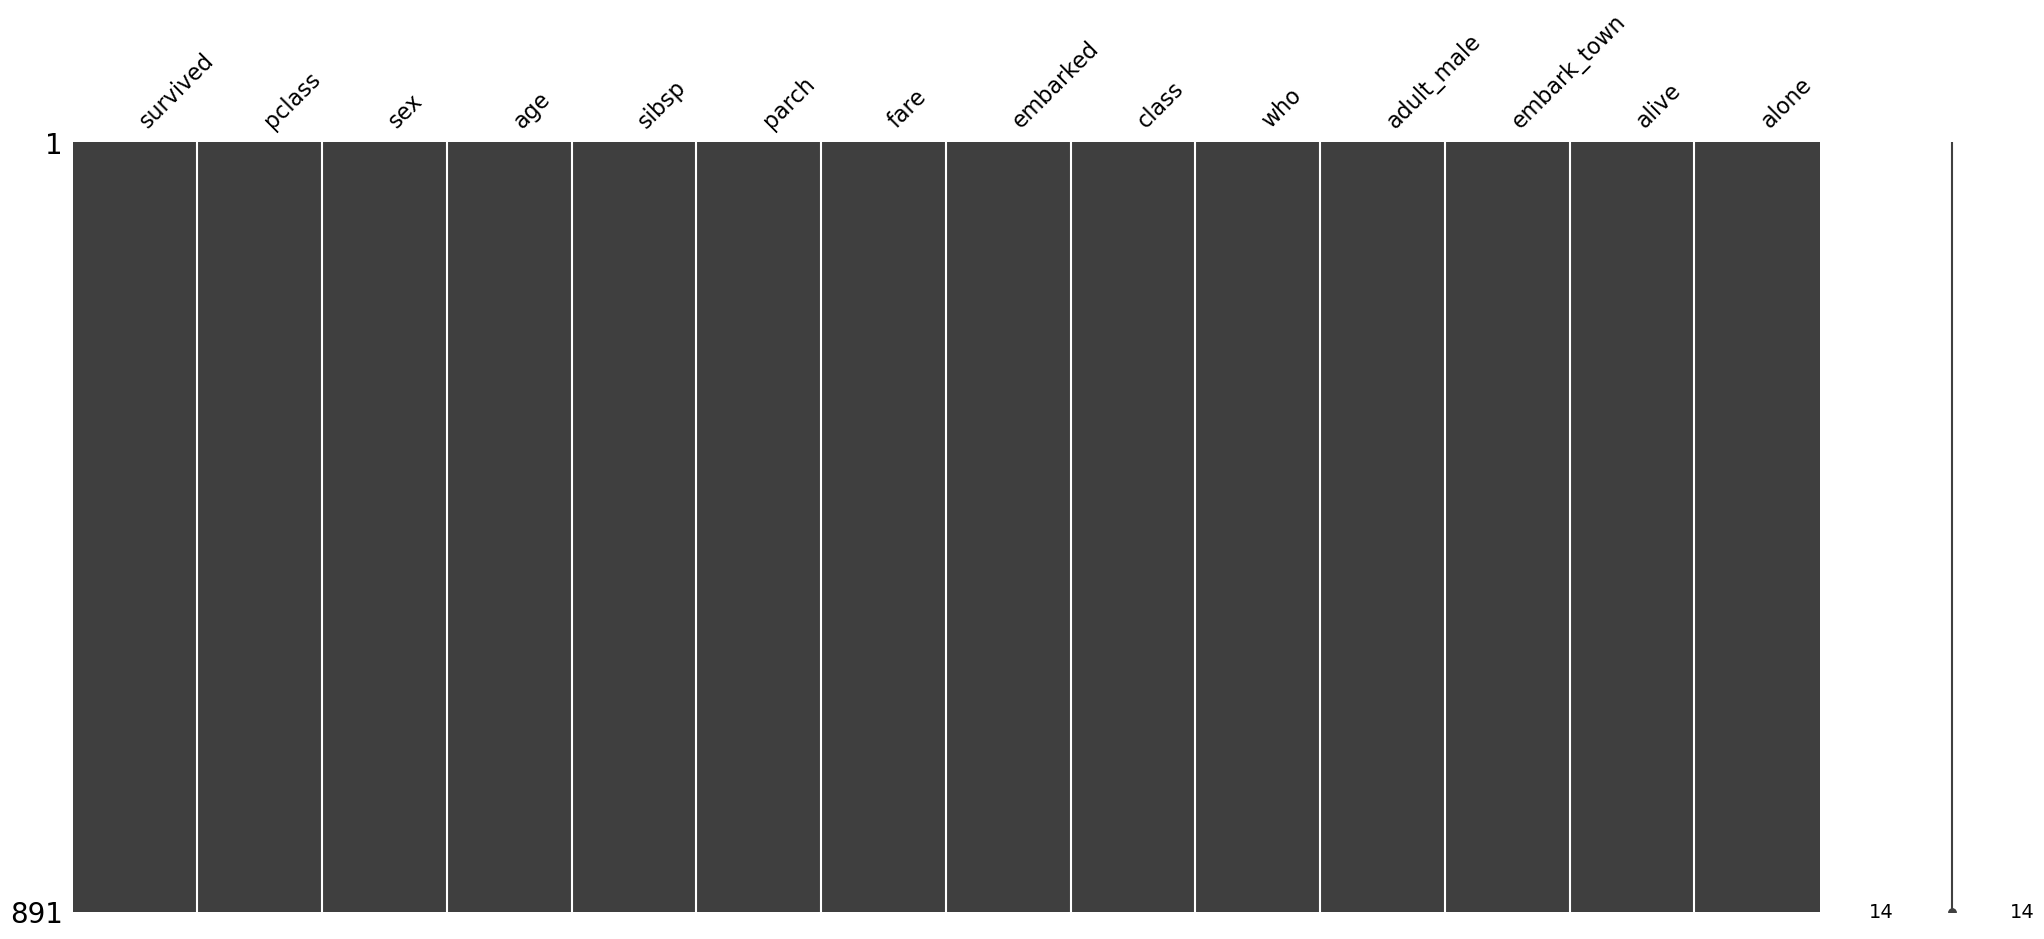

In [20]:
imputer_age = SimpleImputer(strategy="median")
titanic["age"] = imputer_age.fit_transform(titanic[["age"
]])
msno.matrix(titanic)

**스케일링**

In [22]:
from patsy import demo_data

In [23]:
#임의의 실수형 데이터
df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


<AxesSubplot:>

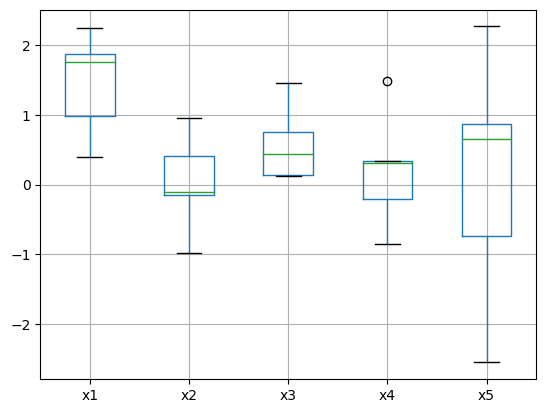

In [24]:
df.boxplot()

In [26]:
from sklearn.preprocessing import StandardScaler
#평균 0, 표준편차 1이 되도록 스케일링
scaler = StandardScaler()
df2=scaler.fit_transform(df)
df3=pd.DataFrame(df2, columns=df.columns)
df3
#df3.boxplot()

,x1,x2,x3,x4,x5
0,0.470603,-1.563986,-0.894240,0.152039,-1.622931
1,-1.574996,1.441239,1.762976,1.655327,0.339756
2,-0.707228,-0.276178,0.357057,-0.546011,0.468792
3,1.185779,-0.201119,-0.939604,0.125344,-0.514569
4,0.625843,0.600045,-0.286189,-1.386700,1.328953


In [27]:
import numpy as np
X = np.arange(7).reshape(7, 1) #7행 1열로 변환
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [28]:
from sklearn.preprocessing import StandardScaler
#평균 0, 표준편차 1이 되도록 스케일링
scaler = StandardScaler()
X2=scaler.fit_transform(X)
X2

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [29]:
# 이상치(outlier)가 존재할 경우
X2 = np.vstack([X, [[1000]]]) #배열을 세로로 쌓는 함수
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [30]:
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

**범주형 데이터 전처리**

In [33]:
import pandas as pd
df1 = pd.DataFrame(['Male','Female'], columns=['x'])
df1

,x
0,Male
1,Female


In [34]:
#더미변수
df2=pd.get_dummies(df1['x'], prefix='gender')
df2

,gender_Female,gender_Male
0,0,1
1,1,0


In [35]:
df3 = pd.DataFrame(["A", "B", "AB", "O"], columns=["x"])
df3

,x
0,A
1,B
2,AB
3,O


In [36]:
df4=pd.get_dummies(df3['x'], prefix='blood')
df4

,blood_A,blood_AB,blood_B,blood_O
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,0,1
